In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

[*********************100%***********************]  1 of 1 completed


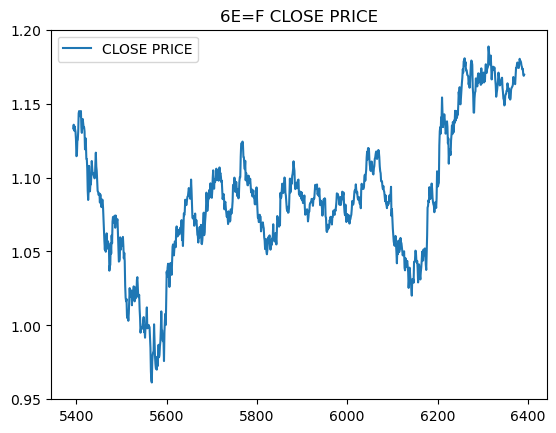

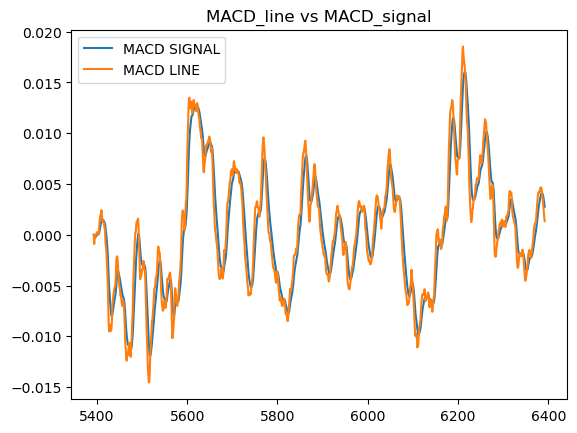

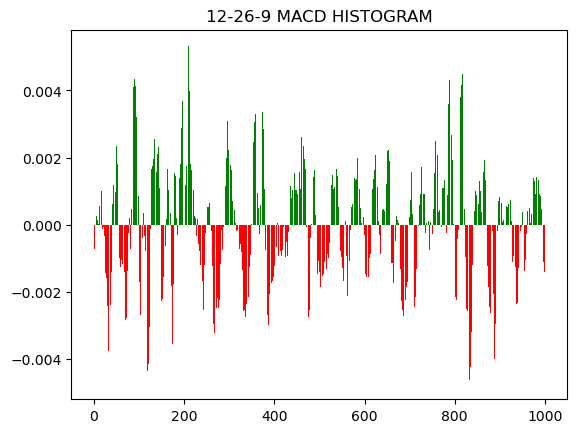

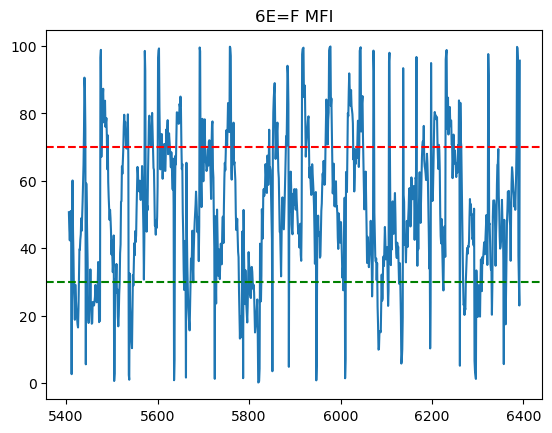

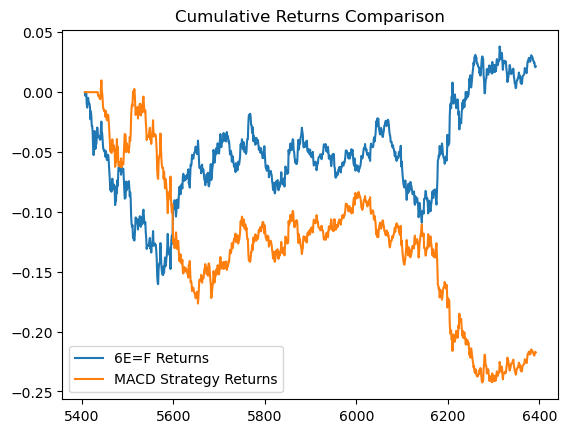

Price,Date,Close,High,Low,Open,Volume,12_ema,26_ema,MACD,MACD_signal,...,Positive_flow,Negative_flow,MFI,signal,MFI_strategy,MACD_strategy,full_strategy,strategy,Asset_returns,strategy_returns
5406,2022-02-04,1.14500,1.14825,1.14175,1.14445,292,1.132084,1.130768,0.001316,0.000425,...,334.339994,0.000000,50.692942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5407,2022-02-07,1.14455,1.14590,1.14180,1.14565,960,1.134002,1.132259,0.001743,0.000689,...,0.000000,1098.320007,45.552102,NaN,0.0,1.0,1.0,0.0,-3.930263e-04,0.000000
5408,2022-02-08,1.14150,1.14500,1.14000,1.14460,860,1.135156,1.133226,0.001930,0.000937,...,0.000000,982.263323,42.346114,NaN,0.0,1.0,1.0,0.0,-3.056755e-03,0.000000
5409,2022-02-09,1.14335,1.14475,1.14060,1.14085,453,1.136416,1.134253,0.002163,0.001182,...,517.733696,0.000000,47.093338,NaN,0.0,1.0,1.0,0.0,-1.441027e-03,0.000000
5410,2022-02-10,1.14500,1.14930,1.13815,1.14260,1325,1.137737,1.135315,0.002422,0.001430,...,1515.998722,0.000000,51.057376,NaN,0.0,1.0,1.0,0.0,-1.110223e-16,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,2026-01-02,1.17315,1.17720,1.17215,1.17545,249,1.175153,1.171782,0.003371,0.003920,...,0.000000,292.367493,96.163502,-1.0,-1.0,-1.0,-2.0,1.0,2.458512e-02,-0.219717
6389,2026-01-05,1.17350,1.17370,1.16685,1.17185,1419,1.174899,1.171909,0.002989,0.003734,...,0.000000,1662.145597,37.734581,-1.0,-1.0,-1.0,-2.0,-1.0,2.489080e-02,-0.219950
6390,2026-01-06,1.16970,1.17480,1.16920,1.17270,557,1.174099,1.171746,0.002353,0.003458,...,0.000000,652.376968,30.476056,-1.0,-1.0,-1.0,-2.0,-1.0,2.157209e-02,-0.217424
6391,2026-01-07,1.16885,1.17085,1.16830,1.16970,557,1.173291,1.171531,0.001760,0.003118,...,0.000000,651.318670,23.047405,-1.0,-1.0,-1.0,-2.0,-1.0,2.082966e-02,-0.216855


In [16]:
ticker = "6E=F"
interval = '1d'
period = 'max'

MFI_LENGTH = 14
OVERBOUGHT = 70
OVERSOLD = 30
#MIDDLE_MAN = 50
LOOKBACK = -1000

MACD_FAST = 12
MACD_SLOW = 26
MACD_SPAN = 9

def get_data(ticker, lookback=LOOKBACK, interval=interval, period=period):
    df = yf.download(ticker, period = period, auto_adjust=True, interval=interval)
    #reset index to get datetime as a column
    df = df.reset_index()

    df.sort_index(inplace=True)
    df.columns = df.columns.get_level_values(0)

    #only return data after lookback
    return df.iloc[lookback:,:]

def add_MACD(df, MACD_FAST, MACD_SLOW, MACD_SPAN):

    df[f'{MACD_FAST}_ema'] = df['Close'].ewm(span=MACD_FAST, adjust=False).mean()
    df[f'{MACD_SLOW}_ema'] = df['Close'].ewm(span=MACD_SLOW).mean()

    #macd line is the difference between the fast and slow ema
    df['MACD'] = df[f'{MACD_FAST}_ema'] - df[f'{MACD_SLOW}_ema']
    #macd signal is a 9-period moving average of the macd line
    df['MACD_signal'] = df['MACD'].ewm(span=MACD_SPAN, adjust=False).mean()
    #MACD histogram is the difference between the MACD line and the MACD signal line
    df['MACD_hist'] = df['MACD'] - df['MACD_signal']


    plt.plot(df['Close'], label='CLOSE PRICE')
    plt.title(f'{ticker} CLOSE PRICE')
    plt.legend()

    plt.figure()
    plt.plot(df['MACD_signal'], label='MACD SIGNAL')
    plt.plot(df['MACD'], label='MACD LINE')
    plt.legend()
    plt.title('MACD_line vs MACD_signal')

    plt.figure()
    plt.bar(range(len(df)), df['MACD_hist'], color=np.where(df['MACD_hist']<0, 'red', 'green'))
    plt.title(f'{MACD_FAST}-{MACD_SLOW}-{MACD_SPAN} MACD HISTOGRAM')

    return df

def MACD_strategy(df):
    df['MACD_strategy'] = 0
    df['MACD_strategy'] = np.where(df['MACD_hist'] > 0, 1, -1)
    df['MACD_strategy'] = df['MACD_strategy'].ffill()
    df['MACD_strategy'] = df['MACD_strategy'].fillna(0)
    df['MACD_strategy'] = df['MACD_strategy'].shift(1)  #shift by 1 to avoid lookahead bias
    return df

def add_MFI(df, MFI_LENGTH):

    df['Average_price'] = (df['High'] + df['Low'] + df['Close']) / 3
    df['Money_flow'] = df['Average_price'] * df['Volume']

    #initialize empty flows
    df['Positive_flow'] = 0
    df['Negative_flow'] = 0

    df['Positive_flow'] = np.where(df['Average_price'] > df['Average_price'].shift(1), df['Money_flow'], 0)
    df['Negative_flow'] = np.where(df['Average_price'] < df['Average_price'].shift(1), df['Money_flow'], 0)

    mfr = df['Positive_flow'].rolling(window=MFI_LENGTH).sum() / df['Negative_flow'].rolling(window=MFI_LENGTH).sum()
    df['MFI'] = 100 - (100 / (1 + mfr))

    plt.figure()
    plt.plot(df['MFI'])
    plt.axhline(OVERBOUGHT, color='red', linestyle='--')    
    plt.axhline(OVERSOLD, color='green', linestyle='--')
    plt.title(f'{ticker} MFI')

    return df.dropna()

def MFI_strategy(df, OVERBOUGHT, OVERSOLD):
    # 1. Create purely Buy (1) and Sell (-1) signals, use NaN for "do nothing"
    conditions = [
        (df['MFI'] > OVERBOUGHT), # Condition 1: Short
        (df['MFI'] < OVERSOLD)    # Condition 2: Long
    ]
    choices = [-1, 1]
    
    # Use np.select to assign 1 or -1, but default to NaN (np.nan) instead of 0
    df['signal'] = np.select(conditions, choices, default=np.nan)

    # 2. Forward Fill (The Memory)
    # This says: "If today is NaN, copy yesterday's position."
    df['MFI_strategy'] = df['signal'].ffill()

    # 3. Handle the start (replace initial NaNs with 0)
    df['MFI_strategy'] = df['MFI_strategy'].fillna(0)

    # 4. Shift to trade "tomorrow"
    df['MFI_strategy'] = df['MFI_strategy'].shift(1)

    return df

def add_full_strategy(df):
    df['full_strategy'] = df['MFI_strategy'] + df['MACD_strategy']

    conditions = [
        (df['full_strategy'] == 2), 
        (df['full_strategy'] == -2)   ]
    choices = [1, -1]
    
    df['signal'] = np.select(conditions, choices, default=np.nan)

    df['strategy'] = df['signal'].ffill()
    df['strategy'] = df['strategy'].fillna(0)
    df['strategy'] = df['strategy'].shift(1)

    return df

def test_strategy(df):
    df['Asset_returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['strategy_returns'] = (1 + df['Close'].pct_change() * df['strategy']).cumprod() - 1

    plt.figure()
    plt.plot(df['Asset_returns'], label=f'{ticker} Returns')
    plt.plot(df['strategy_returns'], label='MACD Strategy Returns')
    plt.legend()
    plt.title('Cumulative Returns Comparison')
    plt.show()

    return df

def main():
    df = get_data(ticker, LOOKBACK, interval, period)
    df = add_MACD(df, MACD_FAST, MACD_SLOW, MACD_SPAN)
    df = add_MFI(df, MFI_LENGTH)
    df = MFI_strategy(df, OVERBOUGHT, OVERSOLD)
    df = MACD_strategy(df)
    df = add_full_strategy(df)
    df = test_strategy(df)
    plt.show()
    return df

df = main()
df